In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [ ]:
import pandas as pd
global_terrorism=pd.read_csv('globalterrorismdb_0718dist.csv',header=0,encoding='unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
global_terrorism

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,197901090003,1979,1,9,NaN,0,NaN,138,Myanmar,5,Southeast Asia,Shan,Mong Tong,20.292237,98.895448,1,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,29.0,Military Unit/Patrol/Convoy,NaN,1st Kayah Rifles regiment,...,NaN,NaN,Automatic firearm,8.0,NaN,NaN,4.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7312,197901090004,1979,1,9,NaN,0,NaN,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,NaN,Radio Future City (Cit

In [ ]:
global_terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
global_terrorism.columns.str.strip()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [ ]:
global_terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,924.000000,7316.000000,7316.000000,7316.0,7316.000000,18.000000,2.000000,7316.000000,6897.000000,7296.000000,109.000000,84.000000,94.000000,10.000000,7.000000,10.000000,0.0,0.0,0.0,7315.000000,11.000000,0.0,7315.000000,1845.000000,854.000000,...,215.000000,7.000000,6.000000,0.0,0.0,0.0,14.000000,7315.000000,5927.000000,325.000000,295.000000,19.000000,17.000000,3.000000,3.0,6507.000000,1144.000000,1145.000000,5273.000000,1119.000000,1072.000000,7315.000000,3448.000000,2.287000e+03,7190.000000,580.000000,580.000000,211.000000,185.000000,7098.000000,2.300000e+02,1.0,7.200000e+01,0.0,371.000000,280.000000,7315.000000,7315.000000,7315.000000,7315.000000
mean,1.975070e+11,1975.003417,6.523237,15.129579,0.029251,238.453390,5.899125,34.842112,-22.783191,1.139284,0.005467,0.997266,0.987015,0.909650,-1.257654,1.372294,0.064243,0.905686,0.0,3.236195,4.222222,3.000000,6.410197,38.516746,167.188596,9.807339,51.904762,213.202128,3.900000,33.000000,182.600000,NaN,NaN,NaN,0.024197,0.545455,NaN,0.002734,-33.888347,-83.175644,...,4.441860,0.857143,3.333333,NaN,NaN,NaN,0.357143,6.551606,11.912435,6.393846,11.542373,7.157895,11.176471,7.000000,16.0,0.785923,0.166958,0.234061,1.061255,0.388740,0.025187,0.550649,3.243039,1.354194e+05,0.080668,-1.463793,0.186207,-1.468009,35.929730,0.032544,6.014240e+06,20000.0,1.566266e+06,NaN,2.865229,6.428571,-3.135885,-3.064252,0.409706,-1.596719
std,2.676603e+08,2.675243,3.477868,9.053688,0.168521,194.540953,3.290733,22.248928,52.465516,0.700851,0.073745,0.052217,0.113218,0.286702,3.316879,0.639890,0.245202,0.292285,0.0,1.983729,2.462795,1.414214,5.890827,29.433240,77.622528,6.756995,27.205430,66.378449,4.148628,20.116328,58.621574,NaN,NaN,NaN,0.153670,0.522233,NaN,0.052221,50.888233,36.709206,...,2.920299,0.377964,3.265986,NaN,NaN,NaN,0.497245,2.113969,7.022859,1.681038,7.225997,2.544344,9.248211,1.732051,5.0,6.264323,1.079966,2.649593,7.851273,2.541234,0.245063,1.093145,0.469039,1.143578e+06,0.272343,66.295438,4.869256,15.685806,81.055942,0.177453,6.622020e+07,NaN,5.339688e+06,NaN,1.302037,24.729981,4.423057,4.486479,0.662392,4.131260
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,53.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.973041e+11,1973.000000,3.000000,7.000000,0.000000,98.000000,2.000000,33.888523,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.500000,1.000000,15.000000

In [ ]:
global_terrorism.shape

(7316, 135)

In [ ]:
count1=global_terrorism.count().tail()

In [ ]:
count1.head()

INT_LOG     7315
INT_IDEO    7315
INT_MISC    7315
INT_ANY     7315
related      469
dtype: int64

In [ ]:
global_missing=global_terrorism.isna()
global_missing.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True


In [ ]:
missing_data_per=global_terrorism.isnull().mean()*100
tot_missing_data=global_terrorism.isnull().sum().sort_values(ascending=False)
missing_data=pd.concat([tot_missing_data,missing_data_per],axis=1,keys=['Total', '%'])
missing_data


,Total,%
guncertain3,7316,100.0
claimmode3,7316,100.0
ransompaidus,7316,100.0
gsubname2,7316,100.0
gname3,7316,100.0
...,...,...
suicide,0,0.0
attacktype1,0,0.0
attacktype1_txt,0,0.0
targtype1,0,0.0


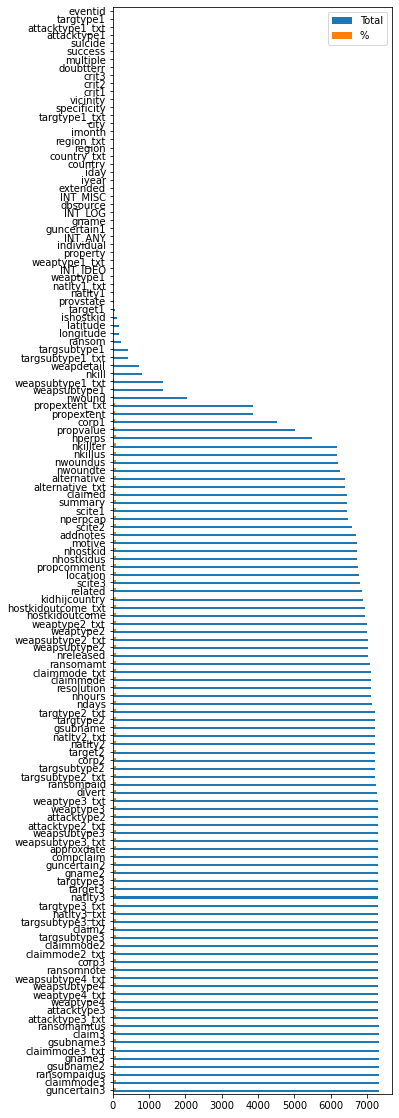

In [ ]:
missing_data.plot(kind='barh',figsize=(5,20))

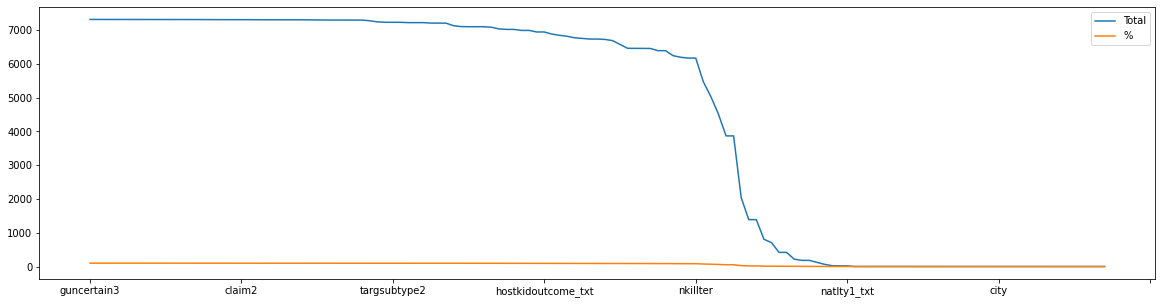

In [ ]:
missing_data.plot(figsize=(20,5))

In [ ]:
df=pd.DataFrame(global_terrorism,columns=['eventid','iyear','imonth','iday','approxdate','extended','resolution','country','country_txt','region','region_txt','provstate','city','latitude','longitude','specificity','vicinity','location','summary','crit1'])

In [ ]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      7316 non-null   int64  
 1   iyear        7316 non-null   int64  
 2   imonth       7316 non-null   int64  
 3   iday         7316 non-null   int64  
 4   approxdate   16 non-null     object 
 5   extended     7316 non-null   int64  
 6   resolution   215 non-null    object 
 7   country      7316 non-null   int64  
 8   country_txt  7316 non-null   object 
 9   region       7316 non-null   int64  
 10  region_txt   7316 non-null   object 
 11  provstate    7290 non-null   object 
 12  city         7316 non-null   object 
 13  latitude     7133 non-null   float64
 14  longitude    7133 non-null   float64
 15  specificity  7316 non-null   int64  
 16  vicinity     7316 non-null   int64  
 17  location     543 non-null    object 
 18  summary      855 non-null    object 
 19  crit1 

In [ ]:
missing_data_per1=df.isnull().mean()*100
total_missing_data1=df.isnull().sum().sort_values(ascending=False)
missing_data1=pd.concat([total_missing_data1,missing_data_per1],axis=1,keys=['Total','%'])
missing_data1

,Total,%
approxdate,7300,99.781301
resolution,7101,97.061236
location,6773,92.577911
summary,6461,88.313286
longitude,183,2.501367
latitude,183,2.501367
provstate,26,0.355385
crit1,0,0.000000
iyear,0,0.000000
imonth,0,0.000000


In [ ]:
df=df.drop(['approxdate','location','resolution'],axis = 1)
df.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,1
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,1


In [ ]:
df[['provstate','summary']]=df[['provstate','summary']].fillna(value='0')

In [ ]:
df[['eventid'	,'iyear','imonth',	'iday',	'extended',	'country',	'country_txt',	'region',	'region_txt',
    'city',	'latitude',	'longitude',	'specificity',	'vicinity'	,'crit1']]=df[['eventid'	,'iyear','imonth',	'iday',	'extended',	'country',	'country_txt',	'region',	'region_txt',	'city',	'latitude',	'longitude',	'specificity',	'vicinity'	,'crit1']].fillna(value=0)
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1,0,0,1
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,0,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,0,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,0,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,0,1


In [ ]:
df.isnull()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7312,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7313,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['iyear'].count

<bound method Series.count of 0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
7311    1979
7312    1979
7313    1979
7314    1979
7315    1979
Name: iyear, Length: 7316, dtype: int64>

In [ ]:
df['region_txt'].count

<bound method Series.count of 0       Central America & Caribbean
1                     North America
2                    Southeast Asia
3                    Western Europe
4                         East Asia
                   ...             
7311                 Southeast Asia
7312                 Western Europe
7313                 Western Europe
7314                 Western Europe
7315                 Western Europe
Name: region_txt, Length: 7316, dtype: object>

In [ ]:
df['country_txt'].count

<bound method Series.count of 0       Dominican Republic
1                   Mexico
2              Philippines
3                   Greece
4                    Japan
               ...        
7311               Myanmar
7312                 Italy
7313        United Kingdom
7314                 Italy
7315                 Italy
Name: country_txt, Length: 7316, dtype: object>

In [ ]:
df['region_txt']=df['region_txt'].str.replace('&','')
df['region_txt']

0       Central America  Caribbean
1                    North America
2                   Southeast Asia
3                   Western Europe
4                        East Asia
                   ...            
7311                Southeast Asia
7312                Western Europe
7313                Western Europe
7314                Western Europe
7315                Western Europe
Name: region_txt, Length: 7316, dtype: object

In [ ]:
df['country_txt']=df['country_txt'].str.replace('&','')
df['country_txt']

0       Dominican Republic
1                   Mexico
2              Philippines
3                   Greece
4                    Japan
               ...        
7311               Myanmar
7312                 Italy
7313        United Kingdom
7314                 Italy
7315                 Italy
Name: country_txt, Length: 7316, dtype: object

In [ ]:
df.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country_txt']=le.fit_transform(df['country_txt'])
df['country_txt']

0       25
1       53
2       68
3       32
4       45
        ..
7311    56
7312    43
7313    92
7314    43
7315    43
Name: country_txt, Length: 7316, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region_txt']=le.fit_transform(df['region_txt'])
df['region_txt']

0        1
1        5
2        8
3       10
4        2
        ..
7311     8
7312    10
7313    10
7314    10
7315    10
Name: region_txt, Length: 7316, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['provstate']=le.fit_transform(df['provstate'])
df['provstate']

0         0
1       151
2       441
3        37
4       159
       ... 
7311    416
7312    241
7313    326
7314    241
7315    241
Name: provstate, Length: 7316, dtype: int64

In [ ]:
analyse_dataset=global_terrorism[global_terrorism['attacktype1_txt'].str.contains("Assassination")]

In [ ]:
analyse_dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,Central America & Caribbean,Guatemala,Guatemala City,14.622869,-90.529068,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,British consulate,"Bodyguard, British Consul",...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,North America,Puerto Rico,San Juan,18.386932,-66.061127,1,0,NaN,3/5/1970: Unknown Puerto Rican Nationalists as...,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",US Navy,Two members of the United States Navy,...,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conflicting reports attribute the incident to ...,Committee on the Judiciary United States Sena...,"William Sater, ""Puerto Rican Terrorists: A Pos...","""Toward People's War for Independence and Soci...",Hewitt Project,0.0,1.0,0.0,1.0,NaN


In [ ]:
analyse_dataset.shape

(1490, 135)

In [ ]:
analyse_dataset.groupby("country_txt").size().sort_values(ascending=False)

country_txt
United Kingdom          789
Spain                   120
Argentina                78
Italy                    70
United States            59
                       ... 
Sweden                    1
Taiwan                    1
Thailand                  1
United Arab Emirates      1
Algeria                   1
Length: 62, dtype: int64

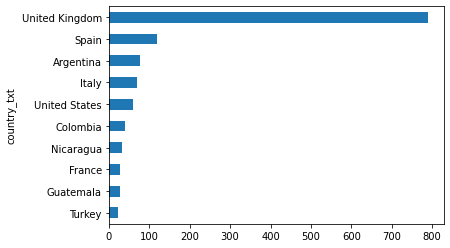

In [ ]:
analyse_dataset.groupby("country_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

In [ ]:
analyse_dataset.groupby("region_txt").size().sort_values(ascending=False)

region_txt
Western Europe                 1057
South America                   146
Middle East & North Africa       85
Central America & Caribbean      79
North America                    66
Sub-Saharan Africa               28
Southeast Asia                   15
Australasia & Oceania             6
East Asia                         4
South Asia                        3
Eastern Europe                    1
dtype: int64

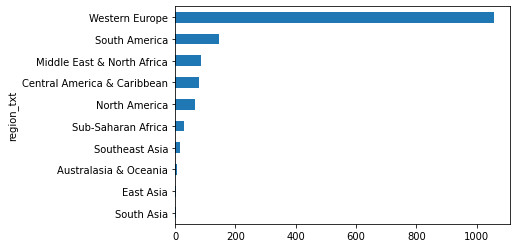

In [ ]:
analyse_dataset.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

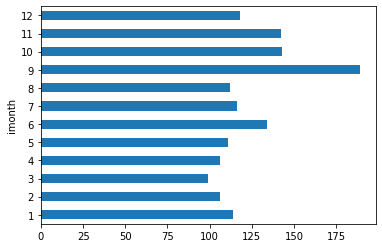

In [ ]:
analyse_dataset.groupby("imonth").size().plot(kind="barh")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city']=le.fit_transform(df['city'])
df['city']

0       1194
1        839
2       1324
3         84
4        506
        ... 
7311     862
7312    1110
7313     163
7314    1110
7315    1110
Name: city, Length: 7316, dtype: int64

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
X=df.iloc[:,0:10]
Y=df.iloc[:,10]

In [ ]:
X

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
0,197000000001,1970,7,2,0,58,25,2,1,0
1,197000000002,1970,0,0,0,130,53,1,5,151
2,197001000001,1970,1,0,0,160,68,5,8,441
3,197001000002,1970,1,0,0,78,32,8,10,37
4,197001000003,1970,1,0,0,101,45,4,2,159
...,...,...,...,...,...,...,...,...,...,...
7311,197901090003,1979,1,9,0,138,56,5,8,416
7312,197901090004,1979,1,9,0,98,43,8,10,241
7313,197901090007,1979,1,9,0,603,92,8,10,326
7314,197901100001,1979,1,10,0,98,43,8,10,241


In [ ]:
Y

0       1194
1        839
2       1324
3         84
4        506
        ... 
7311     862
7312    1110
7313     163
7314    1110
7315    1110
Name: city, Length: 7316, dtype: int64

In [ ]:
X.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
extended       int64
country        int64
country_txt    int64
region         int64
region_txt     int64
provstate      int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=66)




In [ ]:
X_train

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
1885,197305170002,1973,5,17,0,603,92,8,10,326
5477,197710230004,1977,10,23,0,98,43,8,10,406
1563,197209280006,1972,9,28,0,218,94,3,6,462
444,197007310006,1970,7,31,0,217,93,1,5,317
354,197006180002,1970,6,18,0,217,93,1,5,310
...,...,...,...,...,...,...,...,...,...,...
5242,197709030002,1977,9,3,0,162,70,8,10,42
51,197002060005,1970,2,6,0,217,93,1,5,361
631,197012110002,1970,12,11,0,218,94,3,6,295
828,197104230004,1971,4,23,0,217,93,1,5,81


In [ ]:
x_test

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate
4589,197703110001,1977,3,11,0,209,90,10,4,207
771,197103180002,1971,3,18,0,217,93,1,5,155
5320,197709270002,1977,9,27,0,98,43,8,10,241
3516,197601140002,1976,1,14,0,217,93,1,5,81
1706,197301140003,1973,1,14,0,603,92,8,10,326
...,...,...,...,...,...,...,...,...,...,...
2470,197407140002,1974,7,14,0,7,2,8,10,462
761,197103110001,1971,3,11,0,217,93,1,5,446
4205,197610080002,1976,10,8,0,199,84,8,10,60
3383,197510310006,1975,10,31,0,603,92,8,10,326


In [ ]:
y_train

1885     163
5477     245
1563    1324
444      306
354      912
        ... 
5242    1020
51      1096
631      870
828      844
1044     617
Name: city, Length: 5487, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred=logistic_reg.predict(x_test)

In [ ]:
y_pred


array([163, 163, 163, ..., 163, 163, 163])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.09513395297977037


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
y_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([ 617, 1386, 1110, ...,  160,  163,  379])

In [ ]:
y_test

4589     481
771      625
5320    1110
3516    1149
1706     393
        ... 
2470    1324
761      589
4205     182
3383     409
4554     771
Name: city, Length: 1829, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.5921268452706397
